In [4]:
## NIP MH ZS peaks
880 / 4169

## footprint
420 /  4169

## CHIP
609 / 4169

[1] 0.2110818

[1] 0.1007436

[1] 0.1460782

In [5]:
## LD 0.8 lead SNP
11002 / 44881

## footprint
5705 / 44881

## CHIP
6448 / 44881

[1] 0.2451371

[1] 0.1271139

[1] 0.1436688

In [1]:
percent <- data.frame(type=c("Lead SNP","Lead SNP","Lead SNP", "Lead SNP + LD","Lead SNP + LD","Lead SNP + LD"),group=c("ATAC peak","ATAC footprint","ChIP peak","ATAC peak","ATAC footprint","ChIP peak"),percentage=c(21.1,10.0,14.6, 24.5,12.7, 14.4))
percent$group <- factor(percent$group, levels=c("ATAC peak","ChIP peak", "ATAC footprint"))
percent

type,group,percentage
<chr>,<fct>,<dbl>
Lead SNP,ATAC peak,21.1
Lead SNP,ATAC footprint,10.0
Lead SNP,ChIP peak,14.6
Lead SNP + LD,ATAC peak,24.5
Lead SNP + LD,ATAC footprint,12.7
Lead SNP + LD,ChIP peak,14.4


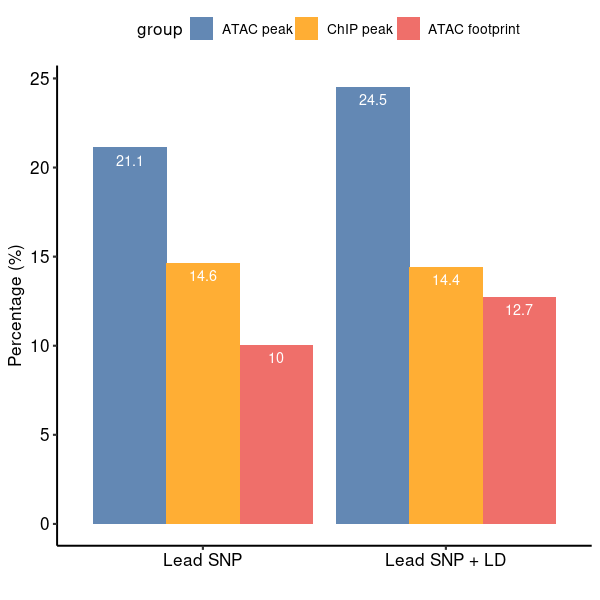

In [3]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 100)
library(ggpubr)
library(paletteer)
ggplot(data=percent, aes(x=type, y=percentage, fill=group)) +
  geom_bar(stat="identity", position=position_dodge())+
  geom_text(aes(label=percentage), vjust=1.6, color="white",
            position = position_dodge(0.9), size=3.5)+
  scale_fill_manual(values=paletteer_d("ggthemes::Superfishel_Stone"))+theme_pubr()+xlab("") + ylab("Percentage (%)")

In [7]:
library(org.Osativa.eg.db)
library(ChIPseeker)
library(clusterProfiler)
library(GenomicFeatures)

gff_file <- "~/genome/oryza_sativa.gtf"
txdb <- makeTxDbFromGFF(gff_file)

peak <- readPeakFile("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/our_gwas/leadSNP/all_leadSNP_meta.txt")
peakAnno <- annotatePeak(peak, tssRegion=c(-3000, 3000),
                         TxDb=txdb, annoDb="org.Osativa.eg.db")
df <- peakAnno@annoStat
df$Feature <- gsub("1st Exon","Exon",df$Feature)
df$Feature <- gsub("Other Exon","Exon",df$Feature)
df$Feature <- gsub("1st Intron","Intron",df$Feature)
df$Feature <- gsub("Other Intron","Intron",df$Feature)
df$Feature <- gsub("Downstream (<=300)","Downstream (<=300 bp)",df$Feature)
constitutive <- aggregate(df$Frequency, by=list(Category=df$Feature), FUN=sum)
constitutive$Category <- factor(constitutive$Category, levels=c(constitutive[order(constitutive$x),]$Category))
constitutive

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
OK



>> preparing features information...		 2023-04-15 11:00:06 AM 
>> identifying nearest features...		 2023-04-15 11:00:06 AM 
>> calculating distance from peak to TSS...	 2023-04-15 11:00:06 AM 
>> assigning genomic annotation...		 2023-04-15 11:00:06 AM 
>> adding gene annotation...			 2023-04-15 11:00:12 AM 


Warning message in annotatePeak(peak, tssRegion = c(-3000, 3000), TxDb = txdb, annoDb = "org.Osativa.eg.db"):
“Unknown ID type, gene annotation will not be added...”


>> assigning chromosome lengths			 2023-04-15 11:00:12 AM 
>> done...					 2023-04-15 11:00:12 AM 


Category,x
<fct>,<dbl>
3' UTR,0.55900621
5' UTR,0.04140787
Distal Intergenic,37.61904762
Downstream (<=300),4.20289855
Exon,0.97308489
Intron,2.91925466
Promoter (<=1kb),23.33333333
Promoter (1-2kb),17.30848861
Promoter (2-3kb),13.04347826


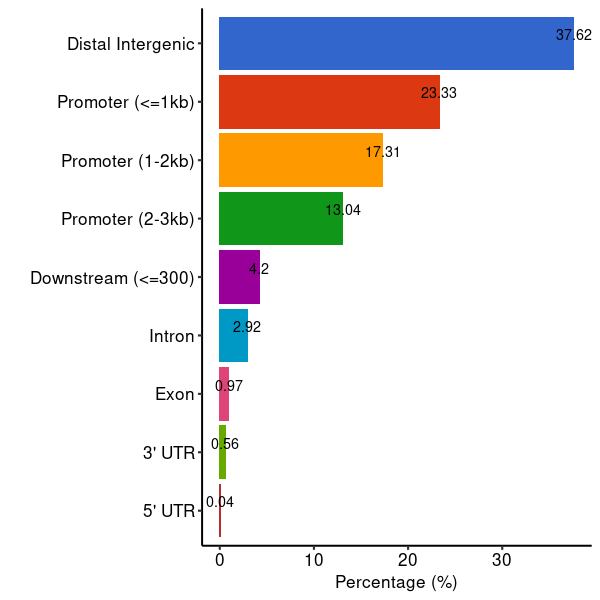

In [8]:
constitutive$pos <- c(99,55,97,95,92,25,73,88,100)
constitutive$x <- round(as.numeric(constitutive$x),2)
p <- ggplot(data=constitutive, aes(x=x, y=Category, fill = Category)) +
  geom_bar(stat="identity")+
  geom_text(aes(label=x), vjust=-0.3, size=3.5)+
  theme_pubr() + scale_fill_manual(values = rev(paletteer_d("ggthemes::gdoc")[1:9]))+ theme(legend.position = "none") +
  xlab("Percentage (%)") + ylab("")
p

In [9]:
meta <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/our_gwas/cheers_LeadSNP_LD_0.8/final_snp/1.txt",sep='|')
head(meta)

,V1,V2,V3,V4,V5,V6
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1_Panicle_Architecture_2013HN.numberofprimary,Xie_PNAS_2015_Primary_branch_number_2013HN,Primary_branch_number_2013HN,Morphological_characteristics,Xie_PNAS_2015,Primary_branch_number
2,1_Panicle_Architecture_2013HN.paniclelength,Xie_PNAS_2015_Panicle_length_2013HN,Panicle_length_2013HN,Morphological_characteristics,Xie_PNAS_2015,Panicle_length
3,1_Panicle_Architecture_2013HN.primarybranchlength,Xie_PNAS_2015_Primary_branch_length_2013HN,Primary_branch_length_2013HN,Morphological_characteristics,Xie_PNAS_2015,Primary_branch_length
4,1_Panicle_Architecture_2013HN.secondarybranchlength,Xie_PNAS_2015_Secondary_branch_length_2013HN,Secondary_branch_length_2013HN,Morphological_characteristics,Xie_PNAS_2015,Secondary_branch_length
5,1_Panicle_Architecture_2013HN.secondarybranchnumber,Xie_PNAS_2015_Secondary_branch_number_2013HN,Secondary_branch_number_2013HN,Morphological_characteristics,Xie_PNAS_2015,Secondary_branch_number
6,1_Panicle_Architecture_2013HN.spikeletsperpanicle,Xie_PNAS_2015_Spikelets_per_panicle_2013HN,Spikelets_per_panicle_2013HN,Yield_components,Xie_PNAS_2015,Spikelets_per_panicle


In [11]:
lead_snp <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/our_gwas/leadSNP/all_leadSNP_meta.txt")
head(lead_snp)

,V1,V2,V3,V4,V5
,<int>,<int>,<int>,<chr>,<chr>
1,4,22486066,22486066,1_Panicle_Architecture_2013HN.numberofprimary_5e-6,1_Panicle_Architecture_2013HN.numberofprimary
2,8,1178219,1178219,1_Panicle_Architecture_2013HN.numberofprimary_5e-6,1_Panicle_Architecture_2013HN.numberofprimary
3,8,1182722,1182722,1_Panicle_Architecture_2013HN.numberofprimary_5e-6,1_Panicle_Architecture_2013HN.numberofprimary
4,7,5317416,5317416,1_Panicle_Architecture_2013HN.numberofprimary_5e-6,1_Panicle_Architecture_2013HN.numberofprimary
5,8,1287915,1287915,1_Panicle_Architecture_2013HN.numberofprimary_5e-6,1_Panicle_Architecture_2013HN.numberofprimary
6,8,1192481,1192481,1_Panicle_Architecture_2013HN.numberofprimary_5e-6,1_Panicle_Architecture_2013HN.numberofprimary


In [12]:
library(xlsx)
lead_snp_res <- merge(lead_snp, meta, by.x="V5", by.y="V1", all=F)
head(lead_snp_res)

,V5,V1,V2.x,V3.x,V4.x,V2.y,V3.y,V4.y,V5.y,V6
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1_Panicle_Architecture_2013HN.numberofprimary,4,22486066,22486066,1_Panicle_Architecture_2013HN.numberofprimary_5e-6,Xie_PNAS_2015_Primary_branch_number_2013HN,Primary_branch_number_2013HN,Morphological_characteristics,Xie_PNAS_2015,Primary_branch_number
2,1_Panicle_Architecture_2013HN.numberofprimary,8,1178219,1178219,1_Panicle_Architecture_2013HN.numberofprimary_5e-6,Xie_PNAS_2015_Primary_branch_number_2013HN,Primary_branch_number_2013HN,Morphological_characteristics,Xie_PNAS_2015,Primary_branch_number
3,1_Panicle_Architecture_2013HN.numberofprimary,8,1182722,1182722,1_Panicle_Architecture_2013HN.numberofprimary_5e-6,Xie_PNAS_2015_Primary_branch_number_2013HN,Primary_branch_number_2013HN,Morphological_characteristics,Xie_PNAS_2015,Primary_branch_number
4,1_Panicle_Architecture_2013HN.numberofprimary,7,5317416,5317416,1_Panicle_Architecture_2013HN.numberofprimary_5e-6,Xie_PNAS_2015_Primary_branch_number_2013HN,Primary_branch_number_2013HN,Morphological_characteristics,Xie_PNAS_2015,Primary_branch_number
5,1_Panicle_Architecture_2013HN.numberofprimary,8,1287915,1287915,1_Panicle_Architecture_2013HN.numberofprimary_5e-6,Xie_PNAS_2015_Primary_branch_number_2013HN,Primary_branch_number_2013HN,Morphological_characteristics,Xie_PNAS_2015,Primary_branch_number
6,1_Panicle_Architecture_2013HN.numberofprimary,8,1192481,1192481,1_Panicle_Architecture_2013HN.numberofprimary_5e-6,Xie_PNAS_2015_Primary_branch_number_2013HN,Primary_branch_number_2013HN,Morphological_characteristics,Xie_PNAS_2015,Primary_branch_number


In [13]:
pie_df <- data.frame(table(lead_snp_res$V4.y, lead_snp_res$V6))
pie_df$Var1 <- factor(pie_df$Var1, levels=c("Morphological_characteristics","Yield_components","Physiological_features","Resistance","Grain_quality","Others","Coloration"))

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


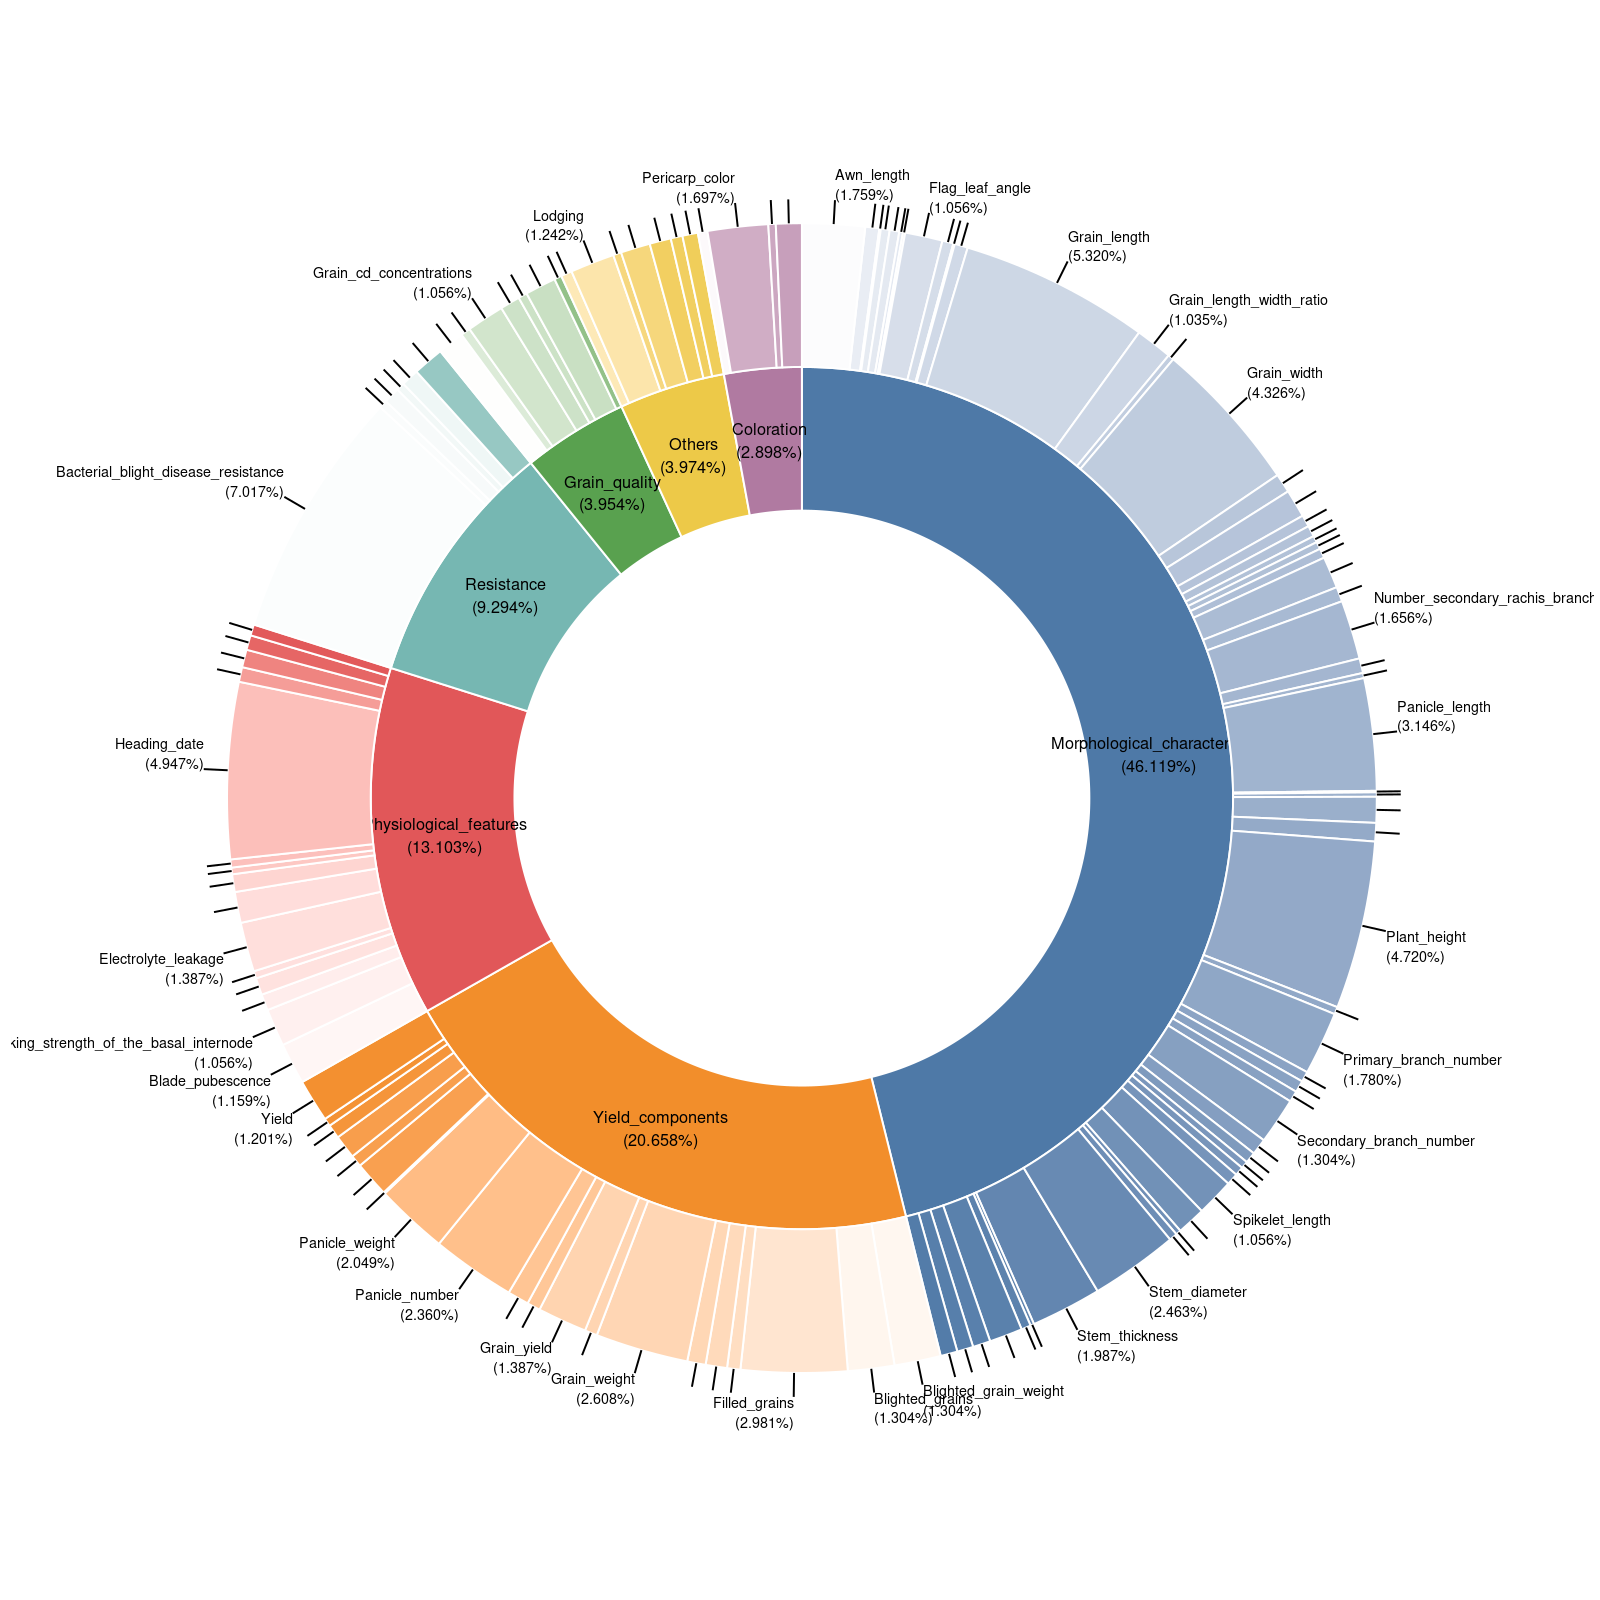

In [15]:
source("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/our_gwas/cheers_LeadSNP_LD_0.8/final_snp/PieDonut.R")
library(ggplot2)
library(moonBook)
library(webr)
library(RColorBrewer)
library(dplyr)
library(tidyr)
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 100)
PieDonutCustom(pie_df, aes(Var1, Var2,count=Freq), showRatioThreshold =0.01,  r0 = 0.6, r1 = 0.9, showPieName =F, donutLabelSize = 3.5,ratioByGroup = FALSE,
               palette_name = paletteer_d("ggthemes::Tableau_10")[1:7],pieAlpha = 1, donutAlpha = 1)

In [17]:
tissue_col <- read.table("/public/workspace/zhutao/encode/figure/fig7/color.txt",comment.char = "", check.names = FALSE)
color <- setNames(tissue_col$V2,tissue_col$V1)
color

Leaf    Sheath      Stem       NPN       PNN     Lemma     Palea    Pistil 
"#2ca02c" "#98df8a" "#32a251" "#acd98d" "#bdbdbd" "#ff9896" "#9467bd" "#c5b0d5" 
   Stamen     Seed1     Seed2     Seed3      SAM1      SAM2      SAM3       AM1 
"#8c564b" "#c49c94" "#e377c2" "#f7b6d2" "#ff7f0e" "#ffbb78" "#d62728" "#ff7f0f" 
      AM2     DBuds  Panicle1  Panicle2  Panicle3  Panicle4   Plumule   Radicle 
"#ffb977" "#b85a0d" "#1f77b4" "#aec7e8" "#17becf" "#9edae5" "#86b4a9" "#82853b" 
   Callus      Root 
"#ccc94d" "#7f7f7f"

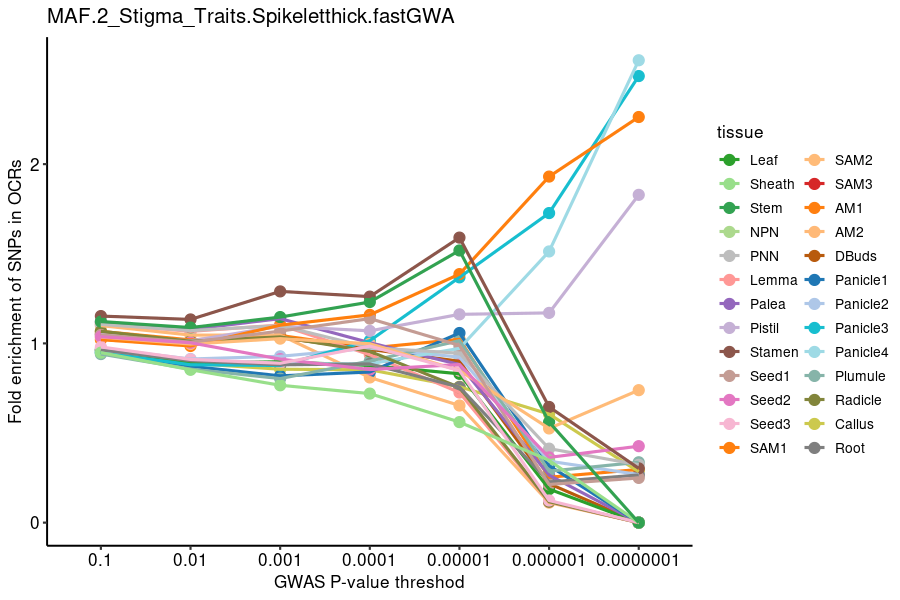

In [18]:
trait <- "MAF.2_Stigma_Traits.Spikeletthick.fastGWA"
res_lst <- list()
a <- 1
for (i in as.numeric(c(0.1, 0.01, 0.001, 0.0001,0.00001,0.000001,0.0000001))){
        gwas_p_snp <- read.table(sprintf("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/diff_p/%s_%s", trait, format(i, scientific = FALSE)))
        if (nrow(gwas_p_snp) >0){
            snp <- read.table(sprintf("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/nip_peak_file/overlap/%s_%s.overlap",trait, format(i, scientific = FALSE)))
            snp$V2 <- snp$V1 / nrow(gwas_p_snp)
            bg <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/nip_peak_file/noncoding_snp/xiewb_noncoding_overalpping_peak_num.txt")
            colnames(bg) <- c("tissue","bg")
            res <- cbind(snp, bg)
            res$fc <- res$V2 / res$bg
            final <- res[,c("tissue","fc")]
            final$group <- format(i, scientific = FALSE)
            res_lst[[a]] <- final
            a <- a+1
     }
 }
df <- bind_rows(res_lst)
df$tissue <- gsub(".bed","",df$tissue)
options(repr.plot.width = 9, repr.plot.height = 6, repr.plot.res = 100)
p1 <- ggplot(df, aes(x =factor(group,levels=c("0.1", "0.01", "0.001", "0.0001","0.00001", "0.000001","0.0000001")) , y = fc, color = tissue, group = tissue)) + 
  geom_point(size=3) + geom_line(size=0.8)+theme_pubr()+xlab("GWAS P-value threshod") + ylab("Fold enrichment of SNPs in OCRs")+
  scale_color_manual(values=color)+theme(legend.position="right")+ggtitle(trait)
p1

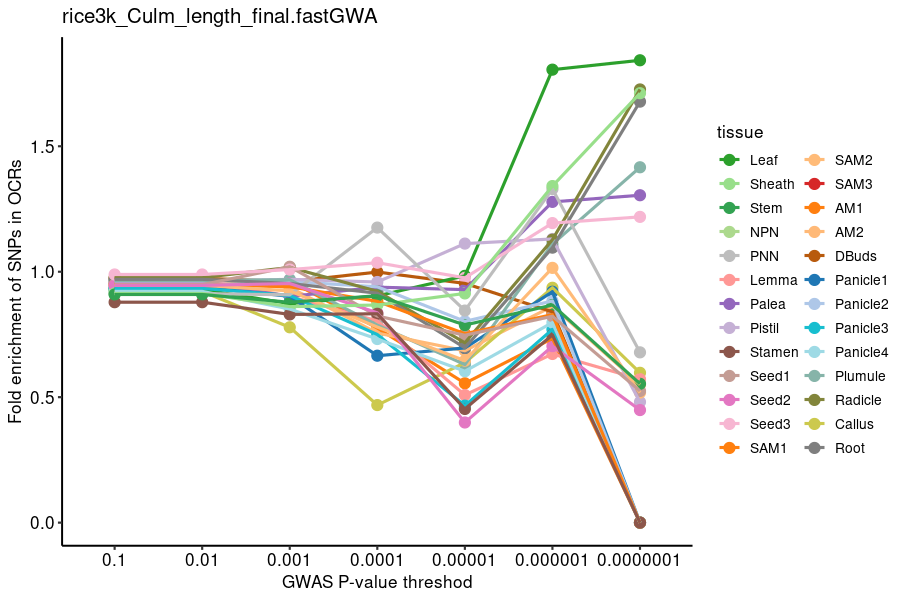

In [19]:
trait <- "rice3k_Culm_length_final.fastGWA"
res_lst <- list()
a <- 1
for (i in as.numeric(c(0.1, 0.01, 0.001, 0.0001,0.00001,0.000001,0.0000001))){
        gwas_p_snp <- read.table(sprintf("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/diff_p/%s_%s", trait, format(i, scientific = FALSE)))
        if (nrow(gwas_p_snp) >0){
            snp <- read.table(sprintf("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/nip_peak_file/overlap/%s_%s.overlap",trait, format(i, scientific = FALSE)))
            snp$V2 <- snp$V1 / nrow(gwas_p_snp)
            bg <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/nip_peak_file/noncoding_snp/xiewb_noncoding_overalpping_peak_num.txt")
            colnames(bg) <- c("tissue","bg")
            res <- cbind(snp, bg)
            res$fc <- res$V2 / res$bg
            final <- res[,c("tissue","fc")]
            final$group <- format(i, scientific = FALSE)
            res_lst[[a]] <- final
            a <- a+1
     }
 }
df <- bind_rows(res_lst)
df$tissue <- gsub(".bed","",df$tissue)
options(repr.plot.width = 9, repr.plot.height = 6, repr.plot.res = 100)
p1 <- ggplot(df, aes(x =factor(group,levels=c("0.1", "0.01", "0.001", "0.0001","0.00001", "0.000001","0.0000001")) , y = fc, color = tissue, group = tissue)) + 
  geom_point(size=3) + geom_line(size=0.8)+theme_pubr()+xlab("GWAS P-value threshod") + ylab("Fold enrichment of SNPs in OCRs")+
  scale_color_manual(values=color)+theme(legend.position="right")+ggtitle(trait)
p1
## Leaf , Sheath

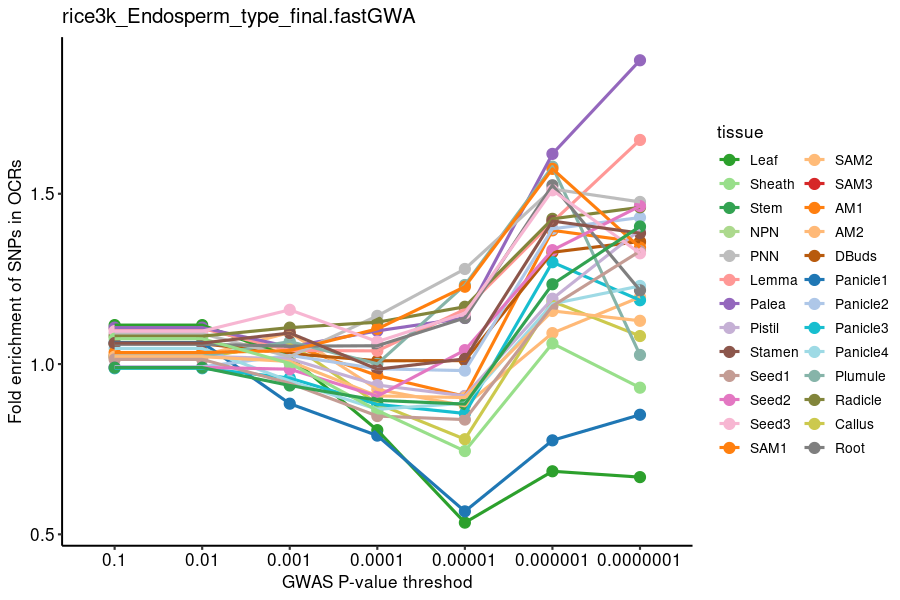

In [20]:
trait <- "rice3k_Endosperm_type_final.fastGWA"
res_lst <- list()
a <- 1
for (i in as.numeric(c(0.1, 0.01, 0.001, 0.0001,0.00001,0.000001,0.0000001))){
        gwas_p_snp <- read.table(sprintf("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/diff_p/%s_%s", trait, format(i, scientific = FALSE)))
        if (nrow(gwas_p_snp) >0){
            snp <- read.table(sprintf("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/nip_peak_file/overlap/%s_%s.overlap",trait, format(i, scientific = FALSE)))
            snp$V2 <- snp$V1 / nrow(gwas_p_snp)
            bg <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/nip_peak_file/noncoding_snp/xiewb_noncoding_overalpping_peak_num.txt")
            colnames(bg) <- c("tissue","bg")
            res <- cbind(snp, bg)
            res$fc <- res$V2 / res$bg
            final <- res[,c("tissue","fc")]
            final$group <- format(i, scientific = FALSE)
            res_lst[[a]] <- final
            a <- a+1
     }
 }
df <- bind_rows(res_lst)
df$tissue <- gsub(".bed","",df$tissue)
options(repr.plot.width = 9, repr.plot.height = 6, repr.plot.res = 100)
p2 <- ggplot(df, aes(x =factor(group,levels=c("0.1", "0.01", "0.001", "0.0001","0.00001", "0.000001","0.0000001")) , y = fc, color = tissue, group = tissue)) + 
  geom_point(size=3) + geom_line(size=0.8)+theme_pubr()+xlab("GWAS P-value threshod") + ylab("Fold enrichment of SNPs in OCRs")+
  scale_color_manual(values=color)+theme(legend.position="right")+ggtitle(trait)
p2
##palea ,lemma

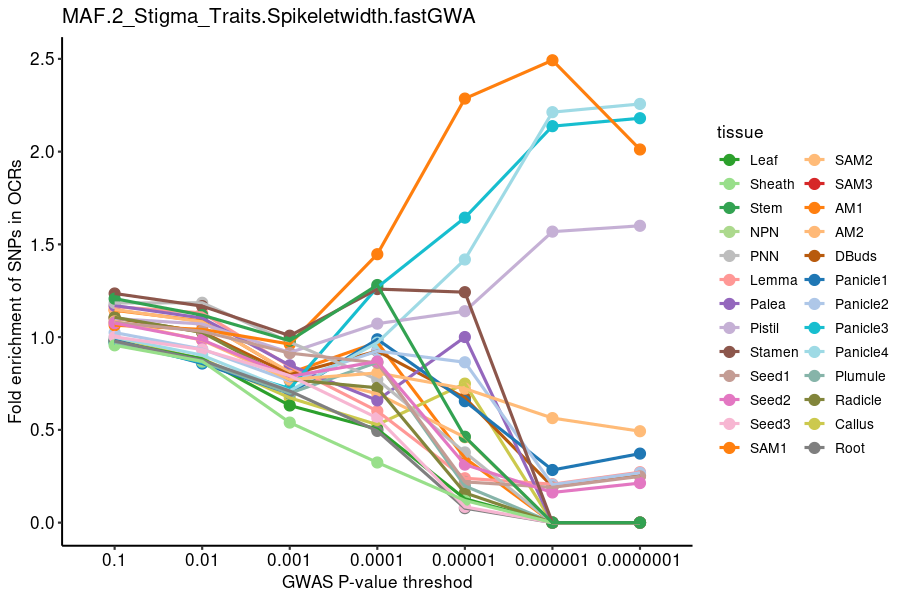

In [21]:
trait <- "MAF.2_Stigma_Traits.Spikeletwidth.fastGWA"
res_lst <- list()
a <- 1
for (i in as.numeric(c(0.1, 0.01, 0.001, 0.0001,0.00001,0.000001,0.0000001))){
        gwas_p_snp <- read.table(sprintf("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/diff_p/%s_%s", trait, format(i, scientific = FALSE)))
        if (nrow(gwas_p_snp) >0){
            snp <- read.table(sprintf("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/nip_peak_file/overlap/%s_%s.overlap",trait, format(i, scientific = FALSE)))
            snp$V2 <- snp$V1 / nrow(gwas_p_snp)
            bg <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/nip_peak_file/noncoding_snp/xiewb_noncoding_overalpping_peak_num.txt")
            colnames(bg) <- c("tissue","bg")
            res <- cbind(snp, bg)
            res$fc <- res$V2 / res$bg
            final <- res[,c("tissue","fc")]
            final$group <- format(i, scientific = FALSE)
            res_lst[[a]] <- final
            a <- a+1
     }
 }
df <- bind_rows(res_lst)
df$tissue <- gsub(".bed","",df$tissue)
options(repr.plot.width = 9, repr.plot.height = 6, repr.plot.res = 100)
p2 <- ggplot(df, aes(x =factor(group,levels=c("0.1", "0.01", "0.001", "0.0001","0.00001", "0.000001","0.0000001")) , y = fc, color = tissue, group = tissue)) + 
  geom_point(size=3) + geom_line(size=0.8)+theme_pubr()+xlab("GWAS P-value threshod") + ylab("Fold enrichment of SNPs in OCRs")+
  scale_color_manual(values=color)+theme(legend.position="right")+ggtitle(trait)
p2

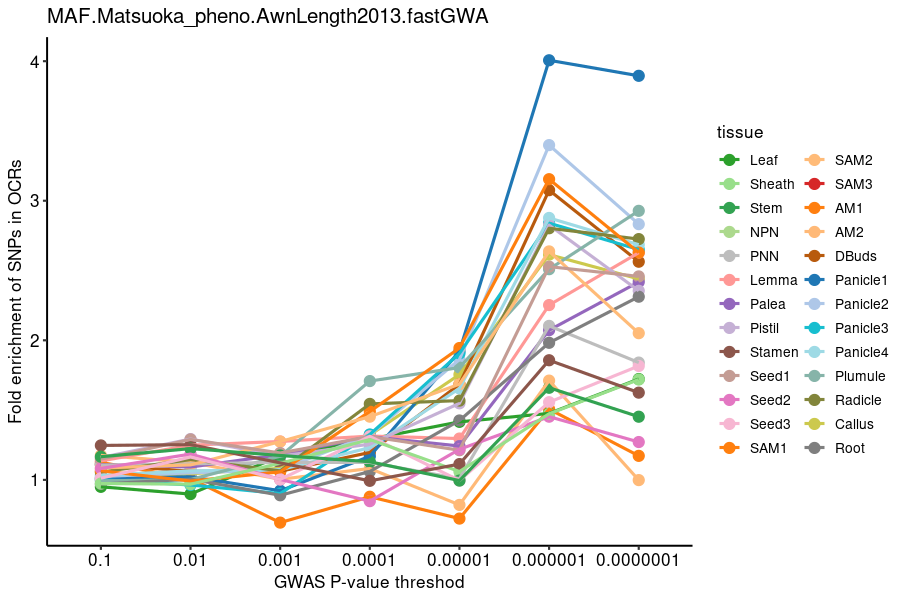

In [22]:
trait <- "MAF.Matsuoka_pheno.AwnLength2013.fastGWA"
res_lst <- list()
a <- 1
for (i in as.numeric(c(0.1, 0.01, 0.001, 0.0001,0.00001,0.000001,0.0000001))){
    gwas_p_snp <- read.table(sprintf("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/diff_p/%s_%s", trait, format(i, scientific = FALSE)))
    if (nrow(gwas_p_snp) >0){
            snp <- read.table(sprintf("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/nip_peak_file/overlap/%s_%s.overlap",trait, format(i, scientific = FALSE)))
            snp$V2 <- snp$V1 / nrow(gwas_p_snp)
            bg <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/nip_peak_file/noncoding_snp/Matsuoka_noncoding_overalpping_peak_num.txt")
            colnames(bg) <- c("tissue","bg")
            res <- cbind(snp, bg)
            res$fc <- res$V2 / res$bg
            final <- res[,c("tissue","fc")]
            final$group <- format(i, scientific = FALSE)
            res_lst[[a]] <- final
            a <- a+1
     }
 }
   df <- bind_rows(res_lst)
   df$tissue <- gsub(".bed","",df$tissue)
   options(repr.plot.width = 9, repr.plot.height = 6, repr.plot.res = 100)
p3 <- ggplot(df, aes(x =factor(group,levels=c("0.1", "0.01", "0.001", "0.0001","0.00001", "0.000001","0.0000001")) , y = fc, color = tissue, group = tissue)) + 
      geom_point(size=3) + geom_line(size=0.8)+theme_pubr()+xlab("GWAS P-value threshod") + ylab("Fold enrichment of SNPs in OCRs")+
      scale_color_manual(values=color)+theme(legend.position="right")+ggtitle(trait)
p3

In [23]:
meta <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/our_gwas/cheers_LeadSNP_LD_0.8/final_snp/meta.group",sep='|',row.names=1)
head(meta)

,V2,V3,V4
,<chr>,<chr>,<chr>
Xie_PNAS_2015_Primary_branch_number_2013HN,Primary_branch_number_2013HN,Morphological_characteristics,Xie_PNAS_2015
Xie_PNAS_2015_Panicle_length_2013HN,Panicle_length_2013HN,Morphological_characteristics,Xie_PNAS_2015
Xie_PNAS_2015_Primary_branch_length_2013HN,Primary_branch_length_2013HN,Morphological_characteristics,Xie_PNAS_2015
Xie_PNAS_2015_Secondary_branch_length_2013HN,Secondary_branch_length_2013HN,Morphological_characteristics,Xie_PNAS_2015
Xie_PNAS_2015_Secondary_branch_number_2013HN,Secondary_branch_number_2013HN,Morphological_characteristics,Xie_PNAS_2015
Xie_PNAS_2015_Spikelets_per_panicle_2013HN,Spikelets_per_panicle_2013HN,Yield_components,Xie_PNAS_2015


In [24]:
trait <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/our_gwas/cheers_LeadSNP_LD_0.8/final_snp/cheers/all_traits_final.txt")
head(trait)

,V1
,<chr>
1,Liang_SCLS_2020_1000-grain_weight_CNMix_LingS16_CK
2,Liang_SCLS_2020_1000-grain_weight_CNMix_LingS16_NoN
3,Liang_SCLS_2020_1000-grain_weight_CNMix_WenJ15
4,Liang_SCLS_2020_1000-grain_weight_NE_JiL16.QS
5,Liang_SCLS_2020_Blighted_grains_per_panicle_NE_JiL16.ZS
6,Liang_SCLS_2020_Blighted_grains_per_plant_CNMix_YangZ15


In [25]:
meta <- meta[rownames(meta) %in%trait$V1, ]
head(meta)

,V2,V3,V4
,<chr>,<chr>,<chr>
Xie_PNAS_2015_Primary_branch_number_2013HN,Primary_branch_number_2013HN,Morphological_characteristics,Xie_PNAS_2015
Xie_PNAS_2015_Panicle_length_2013HN,Panicle_length_2013HN,Morphological_characteristics,Xie_PNAS_2015
Xie_PNAS_2015_Primary_branch_length_2013HN,Primary_branch_length_2013HN,Morphological_characteristics,Xie_PNAS_2015
Xie_PNAS_2015_Secondary_branch_length_2013HN,Secondary_branch_length_2013HN,Morphological_characteristics,Xie_PNAS_2015
Xie_PNAS_2015_Secondary_branch_number_2013HN,Secondary_branch_number_2013HN,Morphological_characteristics,Xie_PNAS_2015
Xie_PNAS_2015_Spikelets_per_panicle_2013HN,Spikelets_per_panicle_2013HN,Yield_components,Xie_PNAS_2015


In [26]:
df <- list()
for (i in unique(rownames(meta))){
    enrich <- read.table(sprintf("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/our_gwas/cheers_LeadSNP_LD_0.8/final_snp/cheers/%s_disease_enrichment_pValues.txt", i))
    enrich <- enrich[enrich$V2 <0.05, ]
    tissue <- read.table(sprintf("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/our_gwas/cheers_LeadSNP_LD_0.8/final_snp/cheers/%s_new_SNPsOverlappingPeaks.txt", i),head=T)
    library(reshape2)
    res <- melt(tissue[,-c(2,3,4,5)],id.vars = c("snp"))
    res$value <- res$value / 88010
    res$group <- ifelse(res$variable %in% enrich$V1, "Enrich","NOT")
    res$type <- meta[sprintf("%s", i), "V3"]
    df[[i]] <- res
}


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [28]:
library(dplyr)
final <- bind_rows(df, .id = "column_label")
final$label <- paste(final$type, final$group, sep='_')
final$type <- factor(final$type, levels=c("Grain_quality", "Coloration","Resistance","Others","Morphological_characteristics","Physiological_features","Yield_components"))
head(final)

,column_label,snp,variable,value,group,type,label
,<chr>,<chr>,<fct>,<dbl>,<chr>,<fct>,<chr>
1,Xie_PNAS_2015_Primary_branch_number_2013HN,7_5446488,AM1,0.8269401,Enrich,Morphological_characteristics,Morphological_characteristics_Enrich
2,Xie_PNAS_2015_Primary_branch_number_2013HN,8_1193172,AM1,0.7882059,Enrich,Morphological_characteristics,Morphological_characteristics_Enrich
3,Xie_PNAS_2015_Primary_branch_number_2013HN,7_5356548,AM1,0.7278491,Enrich,Morphological_characteristics,Morphological_characteristics_Enrich
4,Xie_PNAS_2015_Primary_branch_number_2013HN,7_5465140,AM1,0.5506761,Enrich,Morphological_characteristics,Morphological_characteristics_Enrich
5,Xie_PNAS_2015_Primary_branch_number_2013HN,8_1200461,AM1,0.6339393,Enrich,Morphological_characteristics,Morphological_characteristics_Enrich
6,Xie_PNAS_2015_Primary_branch_number_2013HN,7_5356357,AM1,0.7278491,Enrich,Morphological_characteristics,Morphological_characteristics_Enrich


Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”


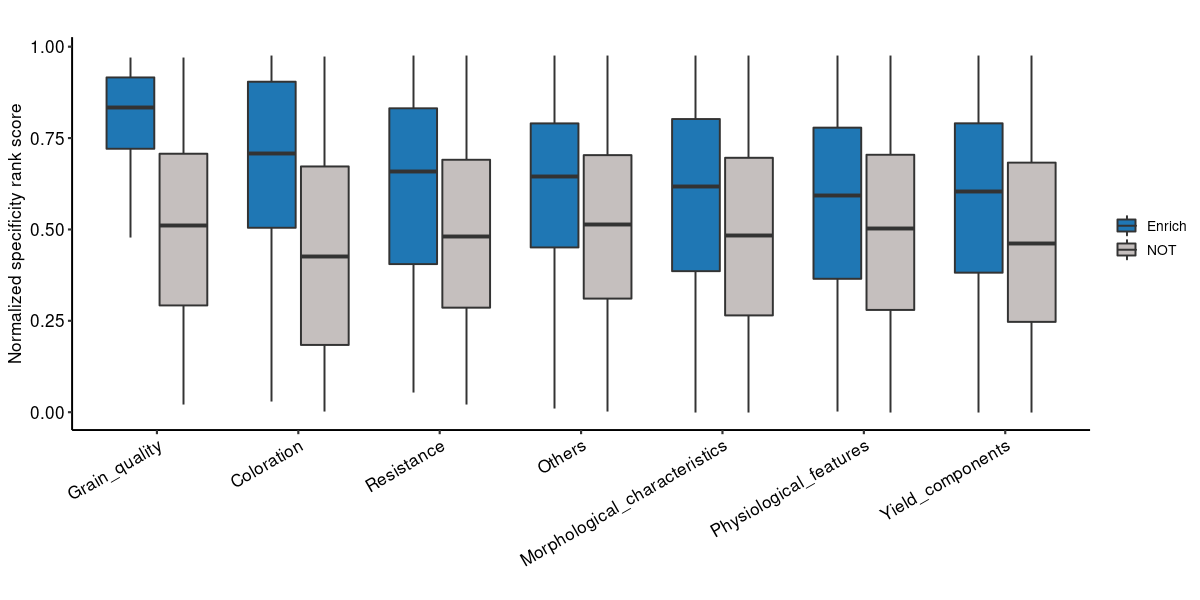

In [29]:
library(paletteer)
library(ggplot2)
library(ggpubr)
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 100)
my_comparisons <- list(c("Enrich","NOT"))
p10 <- ggplot(final, aes(x=type, y=value, fill=group)) +
          geom_boxplot(outlier.shape = NA) +scale_fill_manual(values= c("#1F77B4","#C5BFBE"))+theme_pubr()+
          ylab('Normalized specificity rank score') +xlab("") +theme(axis.text.x = element_text(angle = 30, vjust = 1, hjust=1)) +
          theme(legend.title = element_blank())+ggtitle("") + theme(legend.position='right') +theme(plot.title = element_text(hjust = 0.5))+
          stat_compare_means(comparisons = my_comparisons)
p10

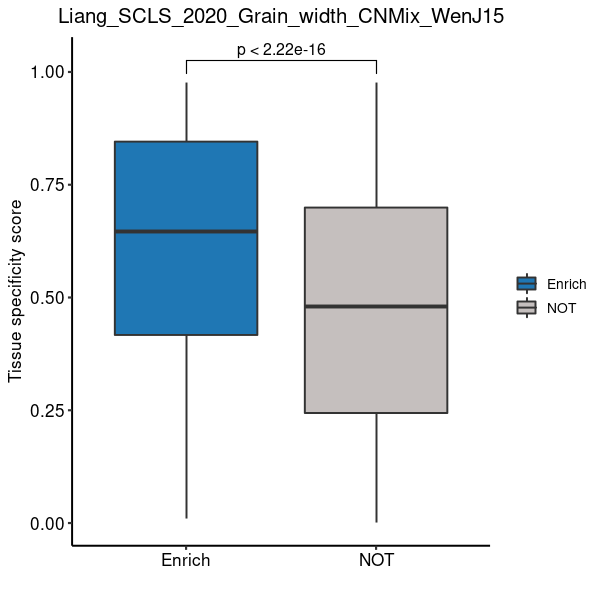

In [33]:
library(paletteer)
library(ggplot2)
library(ggpubr)
trait1 <- final[final$column_label =="Liang_SCLS_2020_Grain_width_CNMix_WenJ15",]
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 100)
my_comparisons <- list(c("Enrich","NOT"))
p11 <- ggplot(trait1, aes(x=group, y=value, fill=group)) +
          geom_boxplot(outlier.shape = NA) +scale_fill_manual(values= c("#1F77B4","#C5BFBE"))+theme_pubr()+
          ylab('Tissue specificity score') +xlab("")  +
          theme(legend.title = element_blank())+ggtitle("") + theme(legend.position='right') +theme(plot.title = element_text(hjust = 0.5))+
          stat_compare_means(comparisons = my_comparisons)+ggtitle("Liang_SCLS_2020_Grain_width_CNMix_WenJ15")
p11

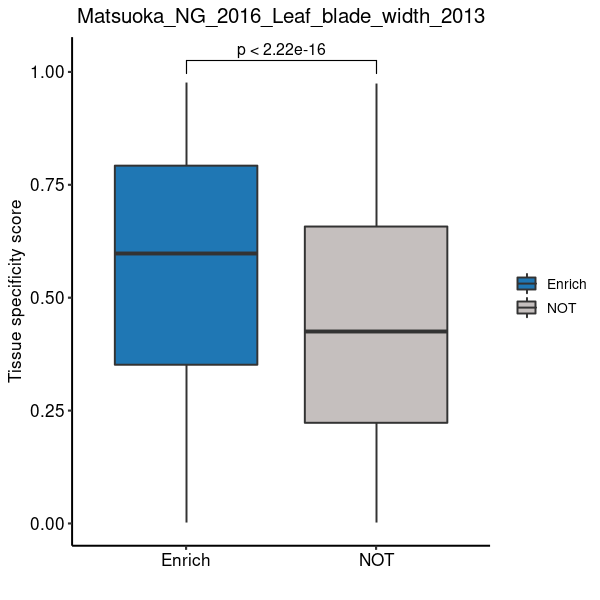

In [34]:
trait2 <- final[final$column_label =="Matsuoka_NG_2016_Leaf_blade_width_2013",]
library(paletteer)
library(ggplot2)
library(ggpubr)
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 100)
my_comparisons <- list(c("Enrich","NOT"))
ggplot(trait2, aes(x=group, y=value, fill=group)) +
          geom_boxplot(outlier.shape = NA) +scale_fill_manual(values= c("#1F77B4","#C5BFBE"))+theme_pubr()+
          ylab('Tissue specificity score') +xlab("")  +
          theme(legend.title = element_blank())+ggtitle("") + theme(legend.position='right') +theme(plot.title = element_text(hjust = 0.5))+
          stat_compare_means(comparisons = my_comparisons)+ggtitle("Matsuoka_NG_2016_Leaf_blade_width_2013")

In [37]:
gwas <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/4_liangcz/MAF.LiangCZ_CNMix_pheno.WenJ15.GW.fastGWA", sep='\t', head=T)
head(gwas)

,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1_1131,1131,C,T,606,0.0825083,-0.01025970,0.0583392,0.860402
2,1,1_1132,1132,G,A,606,0.0808581,-0.00931136,0.0580847,0.872640
3,1,1_1151,1151,A,C,606,0.0948845,0.00538894,0.0197179,0.784621
4,1,1_1203,1203,C,T,606,0.0816832,-0.01482380,0.0586666,0.800517
5,1,1_1249,1249,C,A,606,0.0816832,-0.01482380,0.0586666,0.800517
6,1,1_1266,1266,A,G,606,0.0816832,-0.01482380,0.0586666,0.800517


In [39]:
gwas_f <- gwas[gwas$CHR==5 & gwas$POS>=5021581-2000000 & gwas$POS <=5021581+2000000, ]
#gwas_f <- gwas[gwas$Chr==5, ]
#gwas_f$id <- sprintf("%s_%s", gwas_f$CHR, gwas_f$POS)
gwas_f$Value <-  -log10(gwas_f$P)
head(gwas_f)

,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P,Value
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1439756,5,5_3029668,3029668,A,T,606,0.157591,0.01337720,0.0277057,0.629214,0.20120162
1439757,5,5_3029669,3029669,A,T,606,0.110561,0.01285280,0.0288909,0.656411,0.18282415
1439758,5,5_3029670,3029670,C,T,606,0.113861,0.01835900,0.0294992,0.533708,0.27269629
1439759,5,5_3029671,3029671,A,T,606,0.151815,-0.01866250,0.0301876,0.536432,0.27048532
1439760,5,5_3029675,3029675,C,G,606,0.207921,0.00622288,0.0270881,0.818304,0.08708533
1439761,5,5_3029684,3029684,G,A,606,0.451320,-0.01579120,0.0187416,0.399467,0.39851909


In [40]:
ld_snp <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/bed/4_LiangCZ_data/merge/snp_5_5021581.ld",head=T)
ld_snp_plot <- merge(gwas_f, ld_snp, by.x ="SNP", by.y ="SNP_B", all=F)
head(ld_snp_plot)

,SNP,CHR,POS,A1,A2,N,AF1,BETA,SE,P,Value,CHR_A,BP_A,SNP_A,CHR_B,BP_B,R2
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<dbl>
1,5_3029668,5,3029668,A,T,606,0.157591,0.01337720,0.0277057,0.629214,0.20120162,5,5021581,5_5021581,5,3029668,0.288530
2,5_3029669,5,3029669,A,T,606,0.110561,0.01285280,0.0288909,0.656411,0.18282415,5,5021581,5_5021581,5,3029669,0.176613
3,5_3029670,5,3029670,C,T,606,0.113861,0.01835900,0.0294992,0.533708,0.27269629,5,5021581,5_5021581,5,3029670,0.168567
4,5_3029671,5,3029671,A,T,606,0.151815,-0.01866250,0.0301876,0.536432,0.27048532,5,5021581,5_5021581,5,3029671,0.283589
5,5_3029675,5,3029675,C,G,606,0.207921,0.00622288,0.0270881,0.818304,0.08708533,5,5021581,5_5021581,5,3029675,0.371797
6,5_3029684,5,3029684,G,A,606,0.451320,-0.01579120,0.0187416,0.399467,0.39851909,5,5021581,5_5021581,5,3029684,0.542679


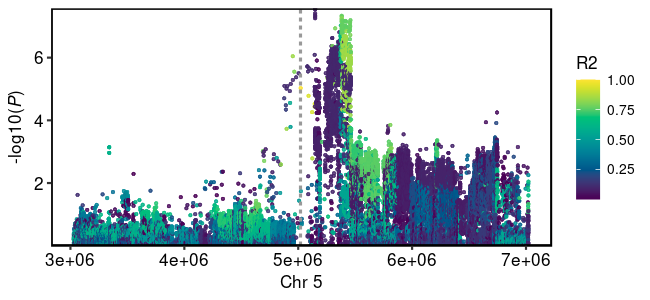

In [42]:
# plant_height <- gwas[, c("CHR","SNPID","position.MSU.v6.corrected", trait)]
# plant_height$position.MSU.v6.corrected <- as.numeric(plant_height$position.MSU.v6.corrected)
# plant_height <- plant_height[complete.cases(plant_height), ]
library(ggrastr)
options(repr.plot.width = 6.5, repr.plot.height = 3, repr.plot.res = 100)

don <- ld_snp_plot %>% 

# Compute chromosome size
group_by(CHR) %>% 
summarise(chr_len=max(POS)) %>% 

# Calculate cumulative position of each chromosome
mutate(tot=cumsum(chr_len)-chr_len) %>%
select(-chr_len) %>%

# Add this info to the initial dataset
left_join(ld_snp_plot, ., by=c("CHR"="CHR")) %>%

# Add a cumulative position of each SNP
arrange(CHR, POS) %>%
mutate( BPcum=POS+tot)
axisdf = don %>% group_by(CHR) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )
# don$P <- -log10(don[,c(4)])
p12 <- ggplot(don, aes(x=POS, y=Value)) +

# Show all points
rasterise(geom_point(aes(color=R2), alpha=0.8, size=0.6), dpi = 300) +
scale_color_gradientn(colors = paletteer_c("grDevices::Viridis", 30))+
#scale_color_manual(values = c(paletteer_d("ggthemes::Tableau_10"),paletteer_d("ggthemes::Winter"))) +

# custom X axis:
#scale_x_continuous( label = axisdf$Chr, breaks= axisdf$center ) +
scale_y_continuous(expand = c(0, 0) ) + theme(legend.position = "right")+#geom_hline(yintercept = 4,  color = "#999999", size=0.5)+
ylab(expression(paste("-log10(", italic("P"),")",sep="")))+xlab('Chr 5') +
            geom_vline(xintercept = 5021581,linetype="dashed", size=0.8, color = "#999999")+
 #       annotate(geom="text", x=5500000, y=50, label="vg0505382632",color="black")+
theme_pubr(
  base_size = 12,
  base_family = "",
  border = TRUE,
  margin = TRUE,
  legend = c( "right"),
  x.text.angle = 0
)
p12
#ggtitle(trait)+theme(plot.title = element_text(hjust = 0.5,size = 16))

Warning message:
“Removed 1 rows containing missing values (geom_point).”


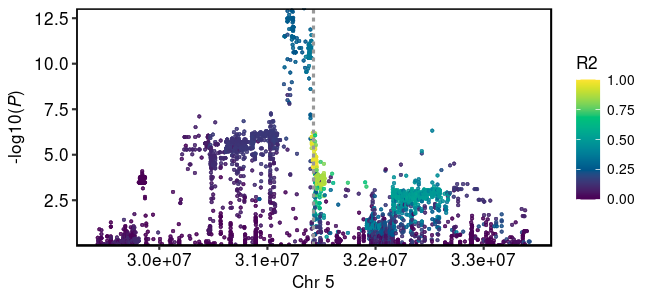

In [43]:
gwas <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/8_Matsuoka/MAF.Matsuoka_pheno.LeafBladeWidth2013.fastGWA", sep='\t', head=T)
gwas_f <- gwas[gwas$CHR==4 & gwas$POS>=31427332-2000000 & gwas$POS <=31427332+2000000, ]
#gwas_f <- gwas[gwas$Chr==5, ]
#gwas_f$id <- sprintf("%s_%s", gwas_f$CHR, gwas_f$POS)
gwas_f$Value <-  -log10(gwas_f$P)
ld_snp <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/bed/8_Masuoka/merge/snp_4_31427332.ld",head=T)
ld_snp_plot <- merge(gwas_f, ld_snp, by.x ="SNP", by.y ="SNP_B", all=F)
# plant_height <- gwas[, c("CHR","SNPID","position.MSU.v6.corrected", trait)]
# plant_height$position.MSU.v6.corrected <- as.numeric(plant_height$position.MSU.v6.corrected)
# plant_height <- plant_height[complete.cases(plant_height), ]
options(repr.plot.width = 6.5, repr.plot.height = 3, repr.plot.res = 100)

don <- ld_snp_plot %>% 

# Compute chromosome size
group_by(CHR) %>% 
summarise(chr_len=max(POS)) %>% 

# Calculate cumulative position of each chromosome
mutate(tot=cumsum(chr_len)-chr_len) %>%
select(-chr_len) %>%

# Add this info to the initial dataset
left_join(ld_snp_plot, ., by=c("CHR"="CHR")) %>%

# Add a cumulative position of each SNP
arrange(CHR, POS) %>%
mutate( BPcum=POS+tot)
axisdf = don %>% group_by(CHR) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )
# don$P <- -log10(don[,c(4)])
p13 <- ggplot(don, aes(x=POS, y=Value)) +

# Show all points
rasterise(geom_point(aes(color=R2), alpha=0.8, size=0.6), dpi = 300) +
scale_color_gradientn(colors = paletteer_c("grDevices::Viridis", 30))+
#scale_color_manual(values = c(paletteer_d("ggthemes::Tableau_10"),paletteer_d("ggthemes::Winter"))) +

# custom X axis:
#scale_x_continuous( label = axisdf$Chr, breaks= axisdf$center ) +
scale_y_continuous(expand = c(0, 0) ) + theme(legend.position = "right")+#geom_hline(yintercept = 4,  color = "#999999", size=0.5)+
ylab(expression(paste("-log10(", italic("P"),")",sep="")))+xlab('Chr 5') +
            geom_vline(xintercept = 31427332,linetype="dashed", size=0.8, color = "#999999")+
 #       annotate(geom="text", x=5500000, y=50, label="vg0505382632",color="black")+
theme_pubr(
  base_size = 12,
  base_family = "",
  border = TRUE,
  margin = TRUE,
  legend = c( "right"),
  x.text.angle = 0
)
p13
#ggtitle(trait)+theme(plot.title = element_text(hjust = 0.5,size = 16))

In [46]:
library(ggrastr)
gwas_plot_list <- list()
for (i in Sys.glob("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/8_Matsuoka/MAF.Matsuoka_pheno.LeafBladeWidth2013.fastGWA")){
    gwas <- read.table(i,head=T)

   gwas <- gwas[gwas$P<0.05,]
   gwas$CHR <- factor(gwas$CHR, levels=c("1","2","3","4","5","6","7","8","9","10","11","12"))

   options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 100)

   don <- gwas %>% 

# Compute chromosome size
   group_by(CHR) %>% 
   summarise(chr_len=max(POS)) %>% 

# Calculate cumulative position of each chromosome
   mutate(tot=cumsum(chr_len)-chr_len) %>%
   select(-chr_len) %>%

# Add this info to the initial dataset
   left_join(gwas, ., by=c("CHR"="CHR")) %>%

# Add a cumulative position of each SNP
   arrange(CHR, POS) %>%
   mutate( BPcum=POS+tot)
   axisdf = don %>% group_by(CHR) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )

   don$Value<- -log10(don$P)
   gwas_plot_list[[i]] <- ggplot(don, aes(x=BPcum, y=Value)) +

# Show all points
   rasterise(geom_point(aes(color=CHR), alpha=0.8, size=0.6), dpi = 300) +
   scale_color_manual(values = c(paletteer_d("ggthemes::Tableau_10"),paletteer_d("ggthemes::Winter"))) +

# custom X axis:
   scale_x_continuous(expand = c(0.01, 0.01) ,label = axisdf$CHR, breaks= axisdf$center ) +
   scale_y_continuous(expand = c(0, 0) ) + theme(legend.position = "right")+#geom_hline(yintercept = 4,  color = "#999999", size=0.5)+
   ylab(expression(paste("-log10(", italic("P"),")",sep="")))+xlab('Chr') +
   theme_pubr(base_size = 12, base_family = "", border = TRUE,margin = TRUE, legend = c( "none"), x.text.angle = 0)+ 
   geom_hline(yintercept = 5,linetype="dashed", size=0.8, color = "#999999")+ggtitle(gsub(".fastGWA","", basename(i))) + 
    theme(plot.title = element_text(hjust = 0.5))
}

Warning message:
“Removed 15 rows containing missing values (geom_point).”


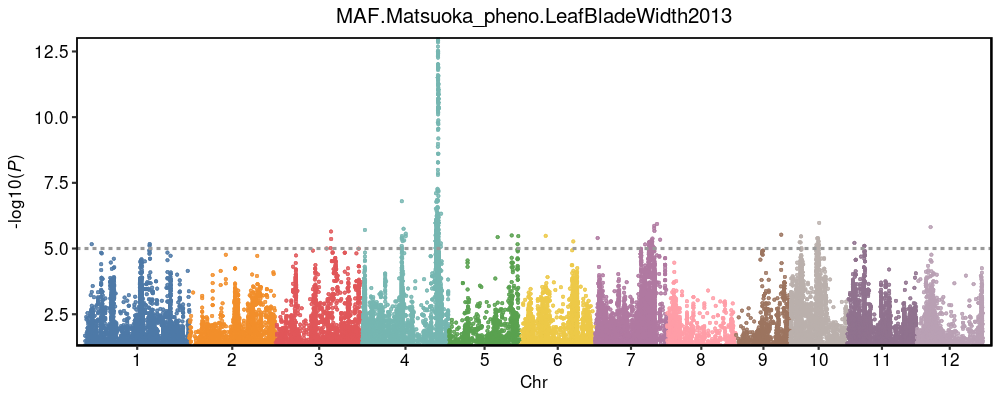

In [47]:
gwas_plot_list[[1]]

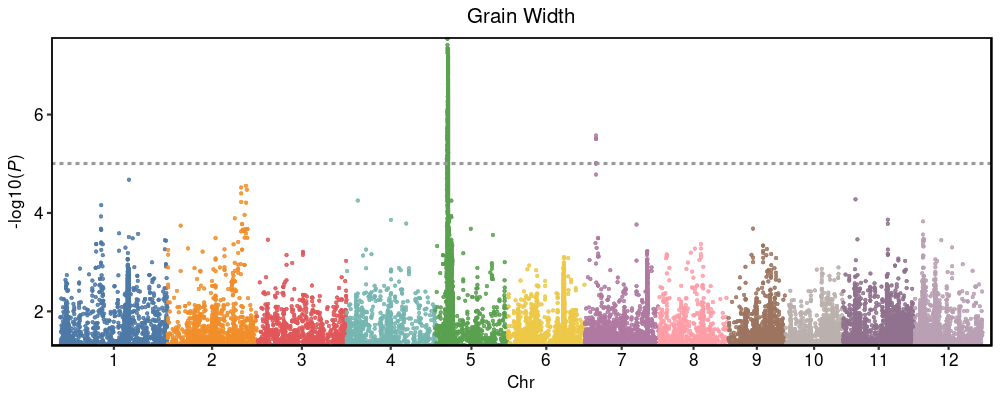

In [49]:
gwas <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/4_liangcz/MAF.LiangCZ_CNMix_pheno.WenJ15.GW.fastGWA",head=T)

gwas <- gwas[gwas$P<0.05,]
gwas$CHR <- factor(gwas$CHR, levels=c("1","2","3","4","5","6","7","8","9","10","11","12"))

options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 100)

don <- gwas %>% 

# Compute chromosome size
group_by(CHR) %>% 
summarise(chr_len=max(POS)) %>% 

# Calculate cumulative position of each chromosome
mutate(tot=cumsum(chr_len)-chr_len) %>%
select(-chr_len) %>%

# Add this info to the initial dataset
left_join(gwas, ., by=c("CHR"="CHR")) %>%

# Add a cumulative position of each SNP
arrange(CHR, POS) %>%
mutate( BPcum=POS+tot)
axisdf = don %>% group_by(CHR) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )

don$Value<- -log10(don$P)

ggplot(don, aes(x=BPcum, y=Value)) +

# Show all points
rasterise(geom_point(aes(color=CHR), alpha=0.8, size=0.6), dpi = 300) +
scale_color_manual(values = c(paletteer_d("ggthemes::Tableau_10"),paletteer_d("ggthemes::Winter"))) +

# custom X axis:
scale_x_continuous(expand = c(0.01, 0.01) ,label = axisdf$CHR, breaks= axisdf$center ) +
scale_y_continuous(expand = c(0, 0) ) + theme(legend.position = "right")+#geom_hline(yintercept = 4,  color = "#999999", size=0.5)+
ylab(expression(paste("-log10(", italic("P"),")",sep="")))+xlab('Chr') +
theme_pubr(base_size = 12, base_family = "", border = TRUE,margin = TRUE, legend = c( "none"), x.text.angle = 0)+ 
geom_hline(yintercept = 5,linetype="dashed", size=0.8, color = "#999999")+ggtitle("Grain Width") + 
theme(plot.title = element_text(hjust = 0.5))

In [50]:
ocr <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/meta/diff_p/res/all_peak_num.txt")
ocr$density <- ocr$V3 / 76015188
ocr$group <- "OCRs"
cds <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/meta/diff_p/res/all_cds_num.txt")
cds$density <- cds$V3 / 78548089
cds$group <- "CDS"
ss <- rbind(ocr, cds)
ss$group <- factor(ss$group,levels=c("OCRs","CDS"))
ss$V2 <- factor(ss$V2, levels=c("e2","e3","e4","e5","e6","e10"))
head(ss)

,V1,V2,V3,density,group
,<chr>,<fct>,<int>,<dbl>,<fct>
1,529_PNAS,e2,32404,0.0004262832,OCRs
2,Huang2015NC,e2,14051,0.0001848446,OCRs
3,LiangCZ,e2,41998,0.0005524949,OCRs
4,Matsuoka,e2,13939,0.0001833712,OCRs
5,rice3k,e2,29307,0.0003855414,OCRs
6,Susan_NC2011,e2,22123,0.0002910339,OCRs


In [51]:
data_summary <- function(data, varname, groupnames){
  require(plyr)
  summary_func <- function(x, col){
    c(mean = mean(x[[col]], na.rm=TRUE),
      sd = sd(x[[col]], na.rm=TRUE))
  }
  data_sum<-ddply(data, groupnames, .fun=summary_func,
                  varname)
  data_sum <- rename(data_sum, c("mean" = varname))
 return(data_sum)
}

In [53]:
df2 <- data_summary(ss, varname="density", 
                    groupnames=c("V2", "group"))
head(df2)

,V2,group,density,sd
,<fct>,<fct>,<dbl>,<dbl>
1,e2,OCRs,3.372615e-04,1.453488e-04
2,e2,CDS,2.962665e-04,1.454060e-04
3,e3,OCRs,1.741319e-04,6.303524e-05
4,e3,CDS,1.066268e-04,6.943044e-05
5,e4,OCRs,7.663819e-05,2.152162e-05
6,e4,CDS,3.978455e-05,3.291918e-05


In [55]:
library(dplyr)
library(ggpubr)
library(rstatix)
stat.test <- ss %>%
  group_by(V2) %>%
  t_test(density ~ group) %>%
  adjust_pvalue(method = "bonferroni") %>%
  add_significance("p.adj")
stat.test

,V2,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,e2,density,OCRs,CDS,6,6,0.4884221,9.999998,0.636000,1.000000,ns
2,e3,density,OCRs,CDS,6,6,1.7632664,9.908055,0.109000,0.654000,ns
3,e4,density,OCRs,CDS,6,6,2.2952589,8.613955,0.048600,0.291600,ns
4,e5,density,OCRs,CDS,6,6,3.2636036,9.179251,0.009530,0.057180,ns
5,e6,density,OCRs,CDS,6,6,5.0355624,9.003983,0.000703,0.004218,**
6,e10,density,OCRs,CDS,6,6,3.4424619,7.664199,0.009390,0.056340,ns


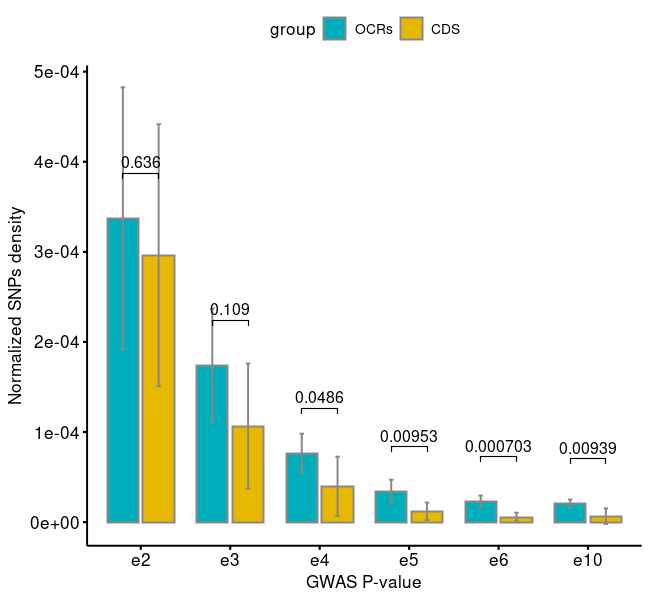

In [57]:
options(repr.plot.width = 6.5, repr.plot.height = 6, repr.plot.res = 100)
bp <- ggbarplot(
  ss, x = "V2", y = "density", add = "mean_sd", 
  fill= "group",color="#8D8680", palette = c("#00AFBB", "#E7B800"),
  position = position_dodge(0.8))
stat.test <- stat.test %>%
  add_xy_position(fun = "mean_sd", x = "V2", dodge = 0.8) 
p1 <- bp + stat_pvalue_manual(
  stat.test,  label = "p", tip.length = 0.01,y.position=rev(sort(df2[df2$group=="OCRs",]$density)+5e-5))+xlab("GWAS P-value")+ylab("Normalized SNPs density")
p1

In [61]:
phe <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/our_gwas/cheers/new_snp/enrich_out/loop.txt",sep='|')
res_lst <- list()
for (i in phe$V1){
    aa <- read.table(sprintf("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/our_gwas/cheers/new_snp/enrich_out/%s_disease_enrichment_pValues.txt",i),row.names=1)
    colnames(aa) <- i 
    #aa$score <- -log10(aa$V2)
    res_lst[[i]] <- aa
    }
library(rlist)
all_res <- list.cbind(res_lst)
all_res <- -log10(all_res)
#colnames(all_res) <- gsub("out","",colnames(all_res))
#rownames(all_res) <- gsub("_raw_new_quant", "", rownames(all_res))
colnames(all_res) <- phe$V1

all_meta <- phe[,c(4,3)]
rownames(all_meta) <- colnames(all_res)
colnames(all_meta) <- c("Type","Study")
all_meta$Type <- factor(all_meta$Type, levels = c("Morphological_characteristics","Physiological_features","Yield_components","Grain_quality","Resistance","Coloration","Others"))
head(all_meta)

,Type,Study
,<fct>,<chr>
Huang_2015_NC_Alkali_digestion_value_21stCN,Grain_quality,Huang_2015_NC
Huang_2015_NC_Amylose_content_21stCN,Grain_quality,Huang_2015_NC
Huang_2015_NC_Blast_resistance_2013HZ,Resistance,Huang_2015_NC
Huang_2015_NC_Chalkiness_degree_21stCN,Grain_quality,Huang_2015_NC
Huang_2015_NC_Gel_consistency_21stCN,Others,Huang_2015_NC
Huang_2015_NC_Grain_length_2012HZ,Yield_components,Huang_2015_NC


In [62]:
snp_num <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig7/hxh_ng2021_gwas/our_gwas/cheers/new_snp/enrich_out/all_snp_num_overlapping.txt")
snp_num$V4 <-snp_num$V2 - snp_num$V3+1
snp_num$percentage <- snp_num$V3 / snp_num$V2
snp_num$percentage <- round(snp_num$percentage,4)*100
snp_num <- snp_num[snp_num$V2 >= 20,]
head(snp_num)

,V1,V2,V3,V4,percentage
,<chr>,<int>,<int>,<dbl>,<dbl>
1,Huang_2015_NC_Alkali_digestion_value_21stCN,20,3,18,15.00
2,Huang_2015_NC_Amylose_content_21stCN,30,5,26,16.67
4,Huang_2015_NC_Chalkiness_degree_21stCN,27,7,21,25.93
6,Huang_2015_NC_Grain_length_2012HZ,40,6,35,15.00
7,Huang_2015_NC_Grain_length_2012SY,33,5,29,15.15
9,Huang_2015_NC_Grain_width_2012HZ,55,7,49,12.73


In [63]:
per_res <- merge(all_meta,snp_num, by.x=0, by.y="V1", all=F)
data_summary <- function(data, varname, groupnames){
  require(plyr)
  summary_func <- function(x, col){
    c(mean = mean(x[[col]], na.rm=TRUE),
      sd = sd(x[[col]], na.rm=TRUE))
  }
  data_sum<-ddply(data, groupnames, .fun=summary_func,
                  varname)
  data_sum <- rename(data_sum, c("mean" = varname))
 return(data_sum)
}
df2 <- data_summary(per_res, varname="percentage", 
                    groupnames=c("Type"))
df2$Type <- factor(df2$Type, levels=c("Grain_quality","Coloration","Resistance","Others",
                                      "Morphological_characteristics","Physiological_features","Yield_components"))
head(df2)

,Type,percentage,sd
,<fct>,<dbl>,<dbl>
1,Morphological_characteristics,19.09912,9.452407
2,Physiological_features,21.79824,10.957696
3,Yield_components,20.57173,9.273777
4,Grain_quality,16.70600,8.474876
5,Resistance,14.93500,1.774838
6,Coloration,20.47000,7.645338


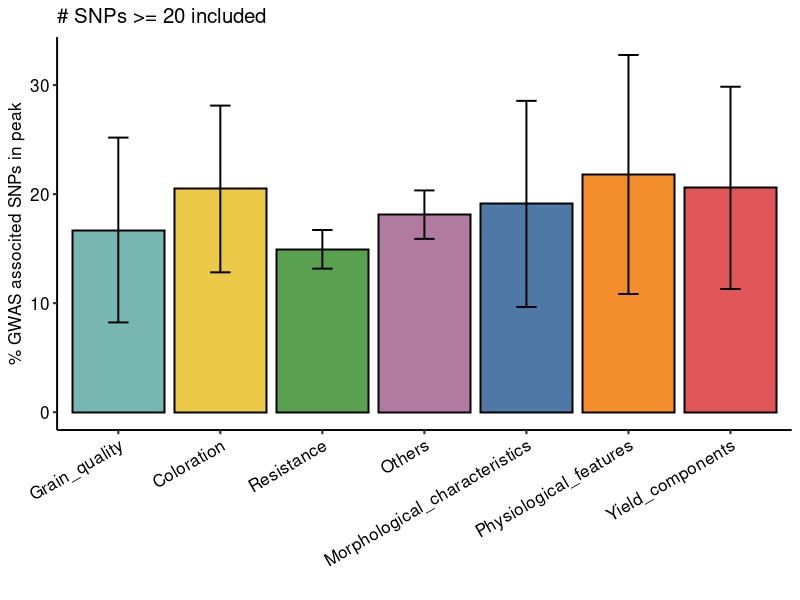

In [64]:
library(ggplot2)
library(paletteer)
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 100)
library(ggpubr)
gcols <- setNames(as.character(paletteer_d("ggthemes::Tableau_10")[1:7]),c("Morphological_characteristics","Physiological_features","Yield_components","Grain_quality","Resistance","Coloration","Others"))
p<- ggplot(df2, aes(x=Type, y=percentage, fill=Type)) + 
  geom_bar(stat="identity", color="black", 
           position=position_dodge()) +
  geom_errorbar(aes(ymin=percentage-sd, ymax=percentage+sd), width=.2,
                 position=position_dodge(.9)) + scale_fill_manual(values=gcols)+theme_pubr()+
  theme(axis.text.x = element_text(angle = 30, vjust = 1, hjust=1))+xlab("")+ylab("% GWAS associted SNPs in peak")+
  theme(legend.position="none")+ggtitle("# SNPs >= 20 included")
p

# QTN Analysis

In [66]:
library(readxl)
all_qtn <- as.data.frame(read_excel("/public/workspace/zhutao/encode/figure/df/RiceNaviQTRSite.xlsx"))
all_qtn <- all_qtn[, c(2,3,8,9)]
all_qtn$Chr <- gsub("Chr","",all_qtn$Chr)
head(all_qtn)

,Chr,Pos_7.0,Ref_geno,Alt_geno
,<chr>,<chr>,<chr>,<chr>
1,1,5271719,TTCAGCCATGGG,T
2,1,5270928,A,C
3,1,5568692,T,C
4,1,8657646,T,<INS>
5,1,18722895,C,T
6,1,22376434,C,T


In [68]:
#all_qtn[nchar(all_qtn$Ref_geno)!=1 | nchar(all_qtn$Alt_geno)!=1, ]
#write.table(all_qtn[nchar(all_qtn$Ref_geno)!=1 | nchar(all_qtn$Alt_geno)!=1, ], "/public/workspace202011/encode/zhutao/analysis/Figure/Fig7/riceNavi/QTN_INDEL.txt",sep='\t',quote=F,col.names=F,row.names=F)
qtn_peak<- read.table("/public/workspace/zhutao/encode/figure/df/qtn_overlapping_peak.txt")
qtn_peak$peak<- sprintf("%s:%s-%s",qtn_peak$V8, qtn_peak$V9,qtn_peak$V10)
head(qtn_peak)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,peak
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>
1,1,5244076,5244076,Plant_Architecture,D2/CYP90D2/SMG11,LOC_Os01g10040,NA,1,5243791,5245854,0.2750,1:5243791-5245854
2,1,29568422,29568422,Abiotic_Stress,OsCBL10,LOC_Os01g51420,decreasing_flooding_tolerance,1,29567874,29569078,0.1986,1:29567874-29569078
3,1,33453244,33453244,Others,OsPME1,LOC_Os01g57854,more_MeOH-Jasmonates,1,33453031,33454407,0.2896,1:33453031-33454407
4,1,36461792,36461792,Seed_Morphology,qSH1,LOC_Os01g62920,seed_shattering,1,36460723,36462038,0.2904,1:36460723-36462038
5,1,37694037,37694037,Others,OsPsbS1,LOC_Os01g64960,decreasing_nonphotochemical_quenching,1,37693554,37694138,0.2012,1:37693554-37694138
6,2,1663821,1663821,Abiotic_Stress,NRAT1,LOC_Os02g03900,decreasing_Al_tolerance,2,1663194,1665900,0.2166,2:1663194-1665900


In [69]:
merge(qtn_peak, all_qtn, by.x=c("V1","V2"), by.y=c("Chr","Pos_7.0"),all =F)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,peak,Ref_geno,Alt_geno
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>
1,29568422,29568422,Abiotic_Stress,OsCBL10,LOC_Os01g51420,decreasing_flooding_tolerance,1,29567874,29569078,0.1986,1:29567874-29569078,GGCC,G
1,33453244,33453244,Others,OsPME1,LOC_Os01g57854,more_MeOH-Jasmonates,1,33453031,33454407,0.2896,1:33453031-33454407,C,T
1,36461792,36461792,Seed_Morphology,qSH1,LOC_Os01g62920,seed_shattering,1,36460723,36462038,0.2904,1:36460723-36462038,T,G
1,37694037,37694037,Others,OsPsbS1,LOC_Os01g64960,decreasing_nonphotochemical_quenching,1,37693554,37694138,0.2012,1:37693554-37694138,A,<DEL>
1,5244076,5244076,Plant_Architecture,D2/CYP90D2/SMG11,LOC_Os01g10040,NA,1,5243791,5245854,0.2750,1:5243791-5245854,G,T
11,7659694,7659694,Biotic_Stress,LHCB5,LOC_Os11g13890,increasing_blast_resistance,11,7659207,7659980,0.1049,11:7659207-7659980,T,C
2,1663821,1663821,Abiotic_Stress,NRAT1,LOC_Os02g03900,decreasing_Al_tolerance,2,1663194,1665900,0.2166,2:1663194-1665900,G,A
2,23991055,23991055,Heading_date,OsCOL4,LOC_Os02g39710,promoting_heading_date,2,23988750,23992452,0.1470,2:23988750-23992452,GTGCA,G
2,35370598,35370598,Secondary_metabolism,Trigonelline_gwas,LOC_Os02g57760,fewer_trigonelline,2,35369938,35371558,0.1530,2:35369938-35371558,G,T


In [71]:
quant <- read.table("/public/workspace/zhutao/encode/figure/df/all_nip_norm_quant_nonumi.csv",row.names=1,head=T)
head(quant)

,AM1,AM2,Callus,DBuds,Leaf,Lemma,Palea,Panicle1,Panicle2,Panicle3,⋯,Radicle,Root,SAM1,SAM2,Seed1,Seed2,Seed3,Sheath,Stamen,Stem
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1:932-1367,29.592998,24.778384,39.674464,26.045605,43.241376,25.322551,28.897345,42.485936,47.680312,42.724650,⋯,21.601305,26.933062,25.379986,23.320625,15.318369,17.555257,27.503044,44.506075,30.861125,23.856659
1:1545-1998,11.335790,7.931271,6.061957,8.677175,4.387354,7.087727,8.790089,6.457198,5.654643,6.014897,⋯,6.042248,3.062709,6.861881,5.837531,5.157944,5.151602,3.985935,2.601420,7.013793,7.298351
1:2880-3185,8.533536,7.572785,4.650813,9.441819,5.469038,7.611844,6.229068,8.544288,8.398536,8.600257,⋯,6.291209,7.870277,10.191581,7.922741,7.490575,6.421707,7.772640,5.519641,5.255528,6.122505
1:10786-12288,12.738729,11.979256,7.361524,10.552038,3.473444,9.191867,10.413689,7.665979,8.374417,6.295128,⋯,20.440145,15.922940,11.828428,13.128515,10.474541,11.874800,9.797109,7.083662,7.432293,14.205680
1:12553-13989,10.678965,10.127125,5.876215,13.569387,3.583657,9.597135,9.659905,11.592298,10.276884,9.458964,⋯,9.255321,4.830805,11.756270,12.033285,11.124700,10.650355,6.543620,4.830071,8.431680,12.598888
1:16207-16945,9.102782,8.809453,6.333020,8.829585,4.472388,7.329082,8.181477,9.224296,8.832764,8.486252,⋯,9.520681,7.579503,10.094199,10.255366,10.107924,9.204151,5.775428,4.927290,9.967929,10.784901


In [72]:
selected_qtn <- merge(qtn_peak, quant, by.x="peak",by.y=0,all=F)
selected_qtn

peak,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,Radicle,Root,SAM1,SAM2,Seed1,Seed2,Seed3,Sheath,Stamen,Stem
<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1:29567874-29569078,1,29568422,29568422,Abiotic_Stress,OsCBL10,LOC_Os01g51420,decreasing_flooding_tolerance,1,29567874,⋯,10.288760,8.688213,9.548040,6.380766,10.551413,11.378676,15.476408,6.068397,6.252554,7.856537
1:33453031-33454407,1,33453244,33453244,Others,OsPME1,LOC_Os01g57854,more_MeOH-Jasmonates,1,33453031,⋯,5.003759,3.985146,4.479121,5.318094,3.584821,6.897511,7.855527,4.159788,13.479840,7.675379
1:36460723-36462038,1,36461792,36461792,Seed_Morphology,qSH1,LOC_Os01g62920,seed_shattering,1,36460723,⋯,9.763615,5.610253,31.320706,19.520101,6.265017,6.971872,5.118773,16.719687,12.995014,6.238903
1:37693554-37694138,1,37694037,37694037,Others,OsPsbS1,LOC_Os01g64960,decreasing_nonphotochemical_quenching,1,37693554,⋯,6.426342,11.350553,4.909693,7.143444,6.816415,7.367662,12.914173,8.532761,3.872063,7.076526
1:5243791-5245854,1,5244076,5244076,Plant_Architecture,D2/CYP90D2/SMG11,LOC_Os01g10040,NA,1,5243791,⋯,7.454565,5.454878,23.965173,18.807443,4.849195,5.342923,8.216577,5.516431,4.634207,3.872937
11:7659207-7659980,11,7659694,7659694,Biotic_Stress,LHCB5,LOC_Os11g13890,increasing_blast_resistance,11,7659207,⋯,13.616151,14.045292,20.626279,24.064680,23.666637,24.596644,26.743343,14.069016,10.923723,19.959526
2:1663194-1665900,2,1663821,1663821,Abiotic_Stress,NRAT1,LOC_Os02g03900,decreasing_Al_tolerance,2,1663194,⋯,16.476096,15.251240,6.327855,6.731137,9.357451,8.770380,6.441183,5.636521,7.838240,9.514093
2:23988750-23992452,2,23991055,23991055,Heading_date,OsCOL4,LOC_Os02g39710,promoting_heading_date,2,23988750,⋯,21.929487,23.955684,24.878635,24.816359,46.761829,41.911987,31.723272,26.730303,43.886823,37.368451
2:35369938-35371558,2,35370598,35370598,Secondary_metabolism,Trigonelline_gwas,LOC_Os02g57760,fewer_trigonelline,2,35369938,⋯,14.701189,12.520105,13.381874,10.061447,9.732948,9.524288,9.083493,6.567692,8.021748,14.852744


In [73]:
df <- selected_qtn[,c(13:36)]
rownames(df) <- paste(selected_qtn$V1,selected_qtn$V2,sep=":")
head(df)

,AM1,AM2,Callus,DBuds,Leaf,Lemma,Palea,Panicle1,Panicle2,Panicle3,⋯,Radicle,Root,SAM1,SAM2,Seed1,Seed2,Seed3,Sheath,Stamen,Stem
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1:29568422,9.610955,12.907450,6.147549,9.741877,5.011126,9.682274,10.181095,8.194021,6.954185,8.765212,⋯,10.288760,8.688213,9.548040,6.380766,10.551413,11.378676,15.476408,6.068397,6.252554,7.856537
1:33453244,7.412705,8.040512,4.638983,5.820248,2.630841,8.041210,9.324564,4.328917,4.153855,3.842169,⋯,5.003759,3.985146,4.479121,5.318094,3.584821,6.897511,7.855527,4.159788,13.479840,7.675379
1:36461792,16.101557,22.248055,9.431760,17.998967,1.916221,7.700518,7.441529,19.574886,17.022751,18.385594,⋯,9.763615,5.610253,31.320706,19.520101,6.265017,6.971872,5.118773,16.719687,12.995014,6.238903
1:37694037,5.721473,4.736192,10.618805,5.470987,8.386469,7.358652,7.219419,6.602445,10.016297,8.077867,⋯,6.426342,11.350553,4.909693,7.143444,6.816415,7.367662,12.914173,8.532761,3.872063,7.076526
1:5244076,15.037183,15.411541,23.245828,20.632923,2.735337,4.788755,4.768619,19.914935,14.927770,19.594705,⋯,7.454565,5.454878,23.965173,18.807443,4.849195,5.342923,8.216577,5.516431,4.634207,3.872937
11:7659694,17.517752,16.489157,14.374602,23.984134,14.324781,24.698003,22.625066,20.055740,16.865666,20.070889,⋯,13.616151,14.045292,20.626279,24.064680,23.666637,24.596644,26.743343,14.069016,10.923723,19.959526


In [74]:
anno <- selected_qtn[,c(2,3,5,8)]
#anno$loc <- paste(anno$V1, anno$V2,sep=":")
rownames(anno) <- paste(anno$V1, anno$V2,sep=":")
anno

,V1,V2,V4,V7
,<int>,<int>,<chr>,<chr>
1:29568422,1,29568422,Abiotic_Stress,decreasing_flooding_tolerance
1:33453244,1,33453244,Others,more_MeOH-Jasmonates
1:36461792,1,36461792,Seed_Morphology,seed_shattering
1:37694037,1,37694037,Others,decreasing_nonphotochemical_quenching
1:5244076,1,5244076,Plant_Architecture,NA
11:7659694,11,7659694,Biotic_Stress,increasing_blast_resistance
2:1663821,2,1663821,Abiotic_Stress,decreasing_Al_tolerance
2:23991055,2,23991055,Heading_date,promoting_heading_date
2:35370598,2,35370598,Secondary_metabolism,fewer_trigonelline


In [75]:
qtn_anno <- data.frame(Type=anno$V4)
rownames(qtn_anno) <- rownames(anno)
qtn_anno

,Type
,<chr>
1:29568422,Abiotic_Stress
1:33453244,Others
1:36461792,Seed_Morphology
1:37694037,Others
1:5244076,Plant_Architecture
11:7659694,Biotic_Stress
2:1663821,Abiotic_Stress
2:23991055,Heading_date
2:35370598,Secondary_metabolism


In [76]:
qtn_cols <- setNames(as.character(paletteer_d("ggthemes::gdoc")[1:9]),unique(qtn_anno$Type))
qtn_col <- list(Type=qtn_cols)

Warning message:
“The input is a data frame, convert it to the matrix.”


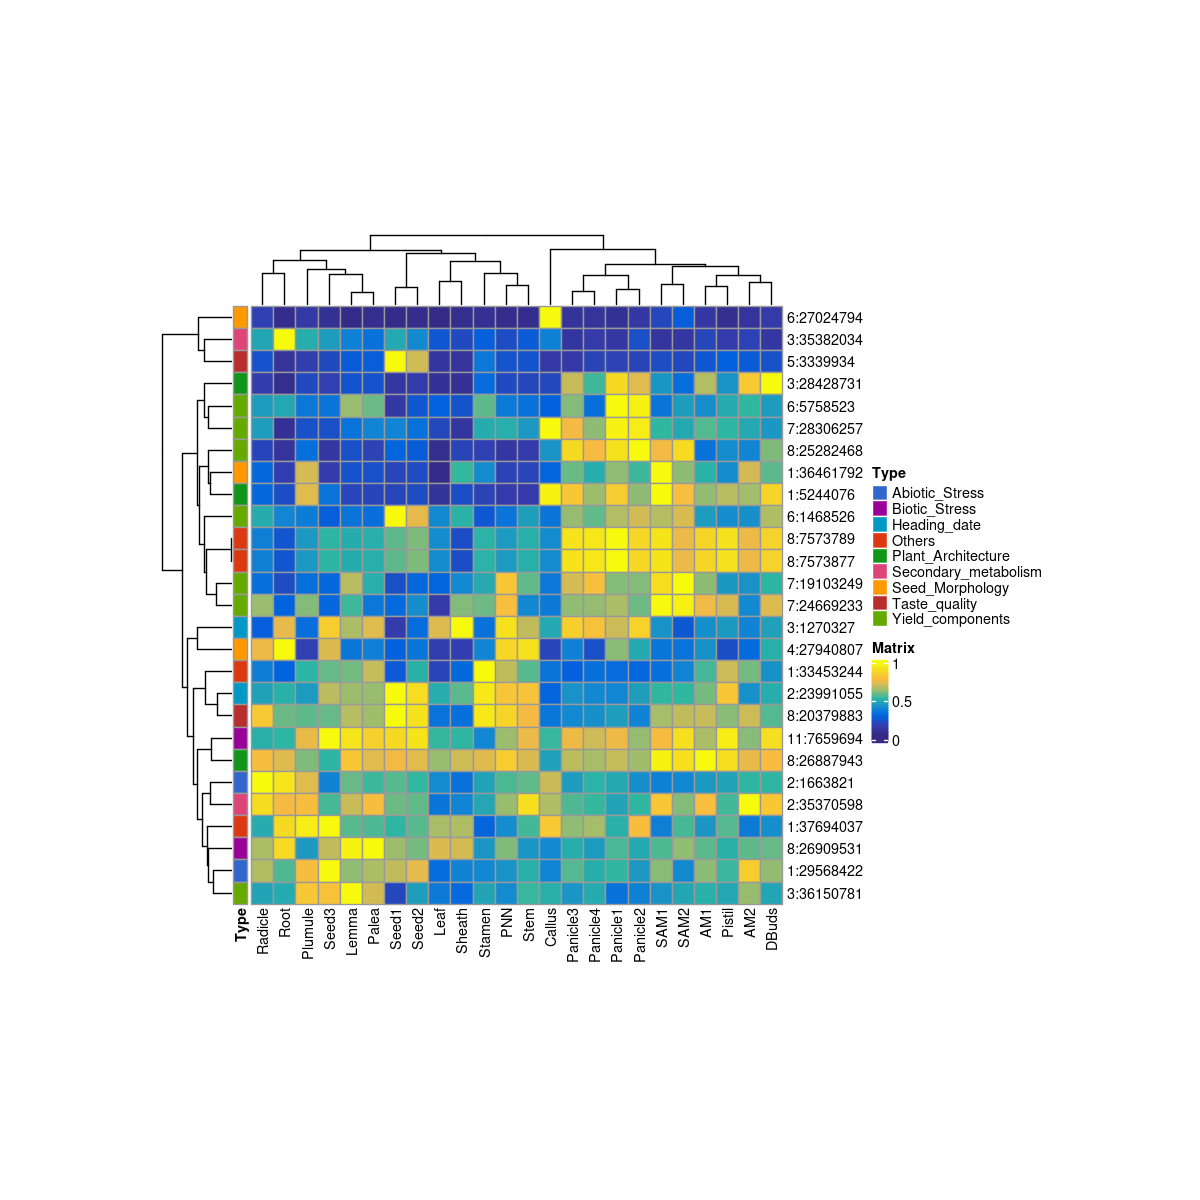

In [80]:
source("/public/workspace/zhutao/scripts/colorpal.R")
options(repr.plot.width = 12, repr.plot.height = 12, repr.plot.res = 100)
p_df <- df/do.call(pmax, df)
pheatmap(p_df,color=paletteContinuous(set = "blueYellow", n = 100),annotation_row = qtn_anno, annotation_colors= qtn_col,cellwidth=16, cellheight=16)

In [81]:
library(ComplexHeatmap)
ha = rowAnnotation(QTNs=anno_text(rownames(p_df), location = 0.5, just = "center",
    gp = gpar(col = rep(paletteer_d("ggthemes::gdoc")[1:9],3), border = "#989CA3"),
    width = max_text_width(rownames(p_df))*1.2),  foo2 = anno_text(c(selected_qtn$V5), location = 0.5, just = "center",
    gp = gpar(col = rep(paletteer_d("ggthemes::gdoc")[1:9],3), border = "#989CA3"),
    width = max_text_width(selected_qtn$V5)*1.2),foo3 = anno_text(c(anno$V7), location = 0.5, just = "center",
    gp = gpar(col = rep(paletteer_d("ggthemes::gdoc")[1:9],3), border = "#989CA3"),
    width = max_text_width(anno$V7)*1.2))
ha

A HeatmapAnnotation object with 3 annotations
  name: heatmap_annotation_2 
  position: row 
  items: 27 
  width: 237.303919607029mm 
  height: 1npc 
  this object is subsetable

 name annotation_type color_mapping       width
 QTNs     anno_text()                26.83256mm
 foo2     anno_text()                 81.4578mm
 foo3     anno_text()               128.31064mm

Warning message:
“The input is a data frame, convert it to the matrix.”


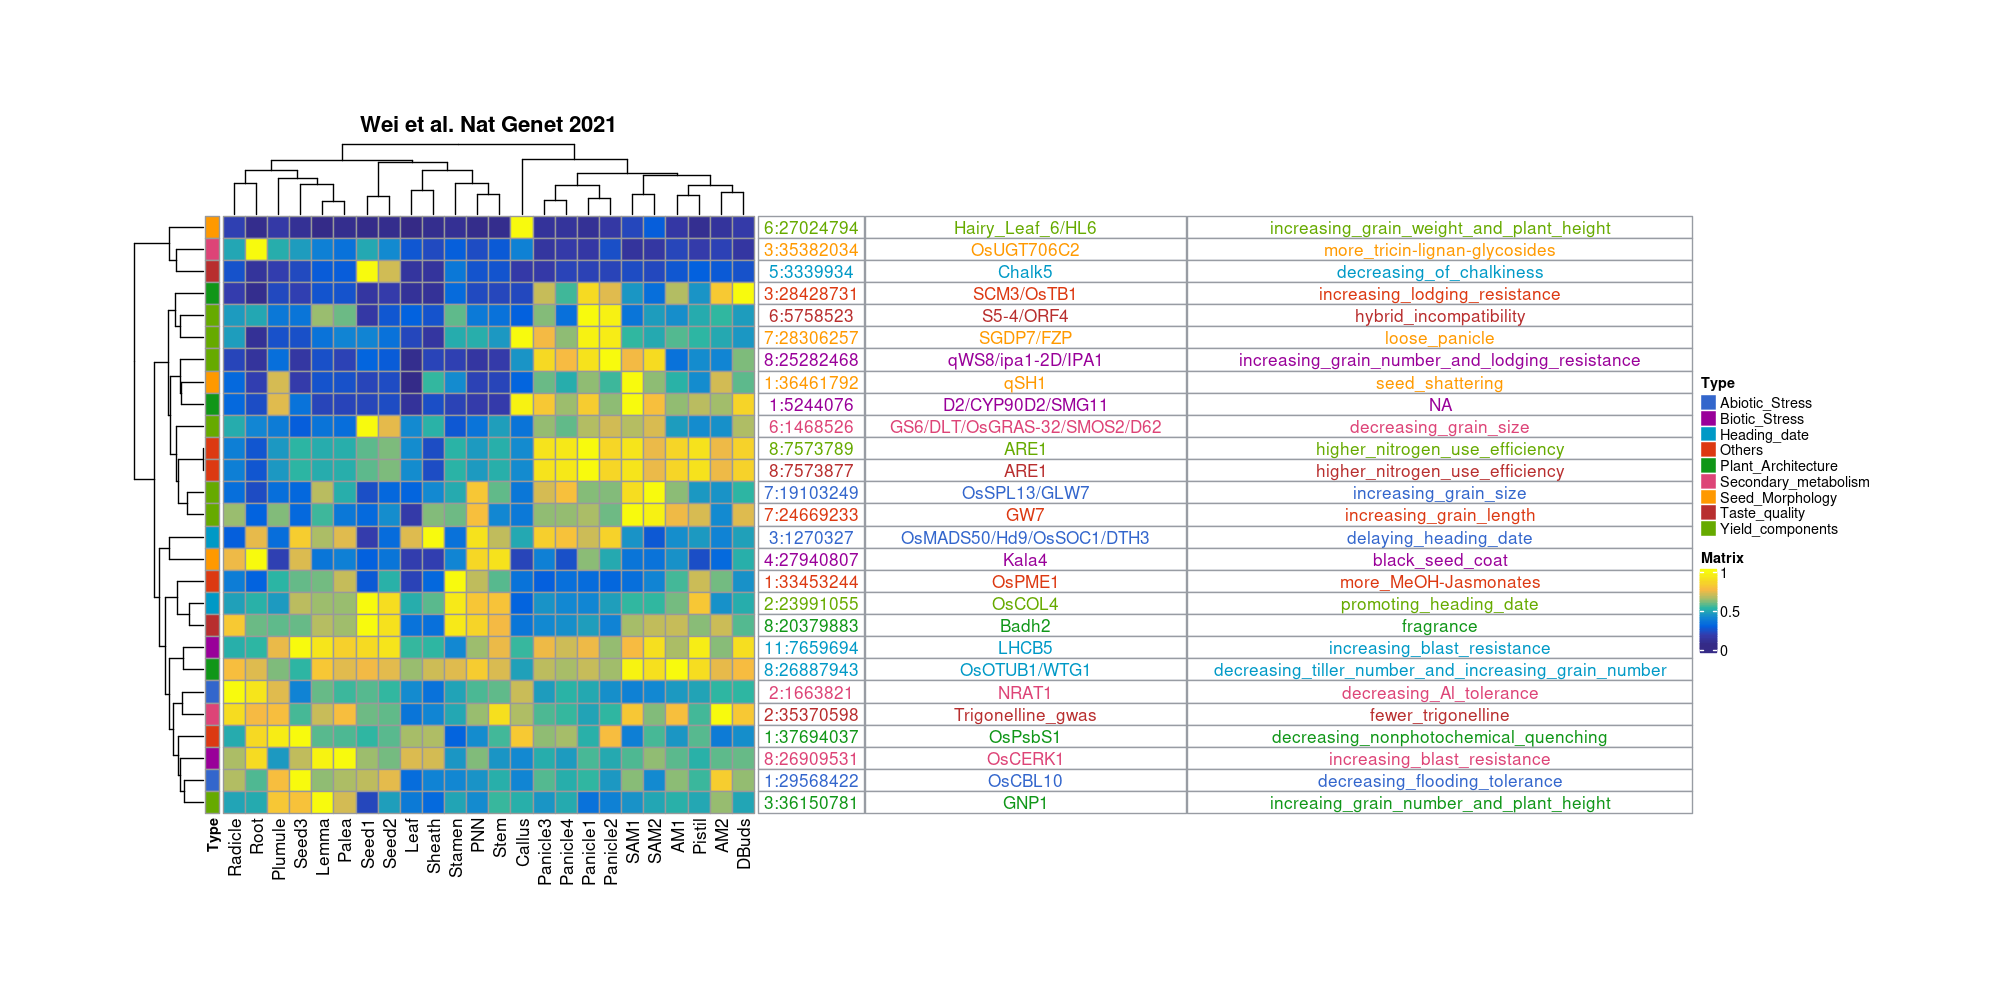

In [82]:
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 100)
p14 <- ComplexHeatmap::pheatmap(p_df,color=paletteContinuous(set = "blueYellow", n = 100),annotation_row = qtn_anno, annotation_colors= qtn_col,cellwidth=16, cellheight=16,right_annotation=ha,show_rownames=F,main="Wei et al. Nat Genet 2021",fontsize =12)
p14